In [1]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.


## Load Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

## Create dataset

In [3]:
import os
path="D:/SHIKHA/MSc AI/2nd Sem/Machine Learning/ML Project 2/DevanagariHandwrittenCharacterDataset/Train/"
files= os.listdir(path)[:10]
print(files)

classes={"character_10_yna":0, "character_11_taamatar":1,"character_12_thaa":2, "character_13_daa":3, "character_14_dhaa":4,"character_15_adna":5, "character_16_tabala":6, "character_17_tha":7,"character_18_da":8,"character_18_da":9}

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha']


In [4]:
import cv2

X=[]
Y=[]

for c1 in classes:
    pth=path+c1
    for img_name in os.listdir(pth):
        img=cv2.imread(pth+"/"+img_name, 0)
        X.append(img)
        Y.append(classes[c1])
print("Dataset created successfully")

Dataset created successfully


In [5]:
pd.Series(Y).value_counts()

0    1700
1    1700
2    1700
3    1700
4    1700
5    1700
6    1700
7    1700
9    1700
dtype: int64

In [6]:
X[0].shape

(32, 32)

In [7]:
print(type(X))

<class 'list'>


In [8]:
X=np.array(X)
Y=np.array(Y)
print(type(X))

<class 'numpy.ndarray'>


## Analyze data

0


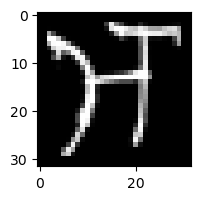

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(X[100], cmap="gray")
print(Y[100])

## Prepare Data

In [10]:
X_new=X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(15300, 1024)
(15300,)


In [11]:
28*28

784

In [12]:
print(X.shape)
print(X.ndim)
print(X_new.ndim)

(15300, 32, 32)
3
2


## Split Data

In [13]:
xtrain,xtest,ytrain,ytest= train_test_split(X_new,Y, test_size=0.2, random_state=10)

In [14]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(12240, 1024) (12240,)
(3060, 1024) (3060,)


## Feature scaling

In [15]:
print(xtrain.max())
print(xtest.max())
x_train=xtrain/255
x_test=xtest/255
print(x_train.max())
print(x_test.max())

255
255
1.0
1.0


## Feature selection : PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
print(x_train.shape, x_test.shape)
pca=PCA(.96)
xtrain=pca.fit_transform(x_train)
xtest=pca.transform(x_test)
print(xtrain.shape, xtest.shape)
print(pca.n_components)
print(pca.n_features_)

(12240, 1024) (3060, 1024)
(12240, 189) (3060, 189)
0.96
1024


In [18]:
ytest[:10]

array([6, 5, 0, 5, 4, 7, 7, 6, 7, 3])

In [26]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=3, learning_rate='auto',init='random')
X_embedded= t_sne.fit_transform(X_new)
X_embedded.shape

(15300, 3)

Neural network

In [27]:
model1= MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=100, activation='relu')
model1.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=100)

In [28]:
x_train_prediction=model1.predict(xtrain)
training_data_accuracy=accuracy_score(x_train_prediction,ytrain)
training_data_accuracy

1.0

In [29]:
x_test_prediction=model1.predict(xtest)
testing_data_accuracy=accuracy_score(x_test_prediction,ytest)
testing_data_accuracy

0.9529411764705882

Support vector machine

In [23]:
model2= SVC()
model2.fit(xtrain,ytrain)

SVC()

In [24]:
xtrain_prediction=model2.predict(xtrain)
training_data_accuracy=accuracy_score(xtrain_prediction,ytrain)
training_data_accuracy

0.9938725490196079

In [25]:
xtest_prediction=model2.predict(xtest)
testing_data_accuracy=accuracy_score(xtest_prediction,ytest)
testing_data_accuracy

0.9803921568627451